## Diabetes Pred 


In [ ]:
%pip install gradio
import gradio as gr

In [ ]:
def main(Pregnancies,Glucose_level,BP,skin_thickness,Insulin,BMI,Diabetes_Function,Age):
  #%pip install numpy
  #%pip install pandas 
  #%pip install matplotlib
  #%pip install sklearn
  #%pip install gradio
  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
  import matplotlib.pyplot as plt
  import gradio as gr
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import r2_score

  url="https://raw.githubusercontent.com/ADITHYASNAIR2021/Dataset-cart/main/diabetes.csv"
  diabetes_df = pd.read_csv(url)
  diabetes_df = diabetes_df.values
  X= diabetes_df[:,0:8] #Predictors
  y = diabetes_df[:,8] #Target 
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

  Log_reg = LogisticRegression(fit_intercept=True,C=1e15,solver='newton-cg',max_iter=300,penalty='l2',multi_class='ovr')
  Log_reg.fit(X_train,y_train)
  Log_pred = Log_reg.predict(X_test)

  #Accuracy
  lor_accuracy = accuracy_score(y_test,Log_pred)

  #Cross Validation
  logreg = LogisticRegression(max_iter=1500)
  scores_Log = cross_val_score(logreg , X_train , y_train , cv=20)
  scores_Log = scores_Log.mean()

  data = {'Pregancies':Pregnancies,'Glucose':Glucose_level,'BloodPressure':BP,'SkinThickness':skin_thickness,'Insulin':Insulin,'BMI':BMI,'DiabetesPedigreeFunction':Diabetes_Function,'Age':Age}
  index = [0]
  cust_df = pd.DataFrame(data, index)
  
  # Main output prediction 
  costpredLog = Log_reg.predict(cust_df)

  #Get the patients BMI information 

  if BMI == 0: 
        Bmi_eval="NA"

  elif BMI < 18.5: 
         Bmi_eval="You are Underweight" 

  elif BMI < 24.9: 
        Bmi_eval =" You have Normal weight"

  elif BMI >= 25 and BMI < 29.9: 
        Bmi_eval = " You are Pre Obese"

  elif BMI >= 30 and BMI < 34.9: 
        Bmi_eval = " You have class 1 Obesity "

  elif BMI >= 35 and BMI < 39.9: 
        Bmi_eval = " You have class 2 Obesity "

  elif BMI >= 40: 
        Bmi_eval ="You have class 3 obesity "

  else: 
       Bmi_eval = BMI

   # Get the patients Diabetic information 

  if Glucose_level == 0: 
        Glucose_Eval ="NA"
    
  elif Glucose_level <= 140: 
        Glucose_Eval="You have Normal Glucose Level"
    
  elif Glucose_level > 140 and Glucose_level < 198: 
        Glucose_Eval="you have Impaired Glucose Tolerance"
        
  elif Glucose_level > 198: 
        Glucose_Eval="You have high Glucose Level "
        
  else: 
        Glucose_Eval = Glucose_level

 # Final prediction 

  if costpredLog ==0:
    Prediction = "There is less chance for the patient to catch with diabetes"

  else:
    Prediction = "There is more of a chance for the patient to catch diabetes."

  return  Prediction,Bmi_eval,Glucose_Eval


In [ ]:
iface = gr.Interface(fn = main,
                     
inputs =['number','number','number','number','number','number','number','number'],

outputs =['text','text','text'],

title="Onset of Diabetes prediction",

examples=[[2,120,120,25,20,25,1,25],[5,200,200,50,160,30,2,30]],

description ='''    Description
 
Some health issues are more serious than others. Example of an extremely serious health issue is diabetes, which is an all-too-common condition
It is important for people with diabetes to be diagnosed and treated as soon as possible, as high blood sugar levels can damage body organs and tissue,
resulting in complications such as nerve damage, kidney damage, heart attacks, strokes, peripheral vascular disease etc. While some risk factors of 
developing diabetes cannot be changed, making healthy lifestyle choices can dramatically reduce a person’s chances of developing it. 

As we face these high numbers of diabetes and prediabetes cases, it’s important that everyone learns as much as they can about recognizing and preventing diabetes. 
All these points emphasis that diabetes can be really bad if not diagnosed properly so, 
with this AI tool we can predict the onset of diabetes among people which will help them to adjust their lifestyles and other things correctly to prevent the diabetes in future.
                     

    Output0 - Describes the Prediction made
    Output1 - Analyse of BMI
    Output2 - Analysis of Glucose level


For more details about the Inputs taken and how it needed to be taken view the bottom artice about this page.
''',

article=''' Website created with Gradio for AIHacks4Good 

Dataset used is :- PIMA INDIANS DIABETES DATASET 

Description of the dataset used :- The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, 
contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. 
Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):

* Pregnancies (number of times pregnant)

* glucose - two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl (Can check using Glucometer at home, or at a clinic)

* Blood Pressure (Diastolic Blood Pressure in mmHg)

* Skin Thickness (Triceps skin fold thickness in mm)

* Insulin Resistance (2 h serum insulin in mu U/ml)( Results could be obtained from a Clinic )

* BMI (Body Mass Index in kg/m2), BMI can be calculated using the equation  = Weight/(Height²)

* Age (years)

* Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history' )
Generally its between 0 - 2.5, if there wasn't any ancestorial history of diabetes you can choose between 0 and 1, and if there is any so can select between 1 - 2.5 regarding the seriousness in family.

To know more about the Tricep skin fold thickness measure 
visit this link:- https://ibb.co/4NDNNx1

Dataset Link - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Reference 1 = https://rpubs.com/ikodesh/53189

Reference 2 = https://www.diabetes.co.uk/oral-glucose-tolerance-test.html 

''')

iface.launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f5cc46cae90>, 'http://127.0.0.1:7860/', None)

## Cancer prediction

In [ ]:
!pip install gradio 
import gradio as gr
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
def main(Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,PassiveSmoker,ChestPain,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring):
  url="https://raw.githubusercontent.com/ADITHYASNAIR2021/Dataset-cart/main/Lung%20Cancer.csv"
  data = pd.read_csv(url)
  print(data.head())
  data.drop(columns = 'Patient Id', axis = 1, inplace= True)
  data['Level'].replace('Medium','High',inplace=True)
  data['Level'].replace('High','1',inplace=True)
  data['Level'].replace('Low','0',inplace=True)
  data['Level'] = pd.to_numeric(data['Level'])
  X = data.drop('Level',axis = 1)
  y = data['Level']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)
  tree_ = DecisionTreeClassifier()
  tree_.fit(X_train,y_train)
  y_pred = tree_.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  data = {'Age':Age,'Gender':Gender,'AirPollution':AirPollution,'Alcoholuse':Alcoholuse,'DustAllergy':DustAllergy,'OccuPationalHazards':OccuPationalHazards,'GeneticRisk':GeneticRisk,'chronicLungDisease':chronicLungDisease,'BalancedDiet':BalancedDiet,'Obesity':Obesity,'Smoking':Smoking,'PassiveSmoker':PassiveSmoker,'ChestPain':ChestPain,'CoughingofBlood':CoughingofBlood,'Fatigue':Fatigue,'WeightLoss':WeightLoss,'ShortnessofBreath':ShortnessofBreath,'Wheezing':Wheezing,'SwallowingDifficulty':SwallowingDifficulty,'ClubbingofFingerNails':ClubbingofFingerNails,'FrequentCold':FrequentCold,'DryCough':DryCough,'Snoring':Snoring}
  index = [0]
  cust_df = pd.DataFrame(data, index)
  costpreddectree = tree_.predict(cust_df)
  if costpreddectree ==0:
    Prediction = "There is less chance for the patient to catch with Cancer"
  else:
    Prediction = "There is more of a chance for the patient to catch Cancer."

  return  Prediction

In [ ]:
  url="https://raw.githubusercontent.com/ADITHYASNAIR2021/Dataset-cart/main/Lung%20Cancer.csv"
  data = pd.read_csv(url)
  data.head()

Patient Id  Age  Gender  AirPollution  Alcoholuse  DustAllergy  \
0         P1   33       1             2           4            5   
1        P10   17       1             3           1            5   
2       P100   35       1             4           5            6   
3      P1000   37       1             7           7            7   
4       P101   46       1             6           8            7   

   OccuPationalHazards  GeneticRisk  chronicLungDisease  BalancedDiet  ...  \
0                    4            3                   2             2  ...   
1                    3            4                   2             2  ...   
2                    5            5                   4             6  ...   
3                    7            6                   7             7  ...   
4                    7            7                   6             7  ...   

   Fatigue  WeightLoss  ShortnessofBreath  Wheezing  SwallowingDifficulty  \
0        3           4                  2         2                     3   
1        1           3                  7         8                     6   
2        8           7                  9         2                     1   
3        4           2                  3         1                     4   
4        3           2                  4         1                     4   

   ClubbingofFingerNails  FrequentCold  DryCough  Snoring  Level  
0                      1             2         3        4    Low  
1                      2             1         7        2   High  
2                      4             6         7        2   High  
3                      5             6         7        5   High  
4                      2             4         2        3   High  

[5 rows x 25 columns]

In [ ]:
iface = gr.Interface(fn = main,
                     
inputs =[gr.Slider(1,100,step=1),gr.Slider(1,2,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1),gr.Slider(1,10,step=1)],

outputs =['text'],

title="Onset of Cancer prediction",

description ='''   The cancer like lung, prostrate, and colorectal cancers contribute up to 45% of cancer deaths. 
So it is very important to detect or predict before it reaches to serious stages. If cancer predicted in its early stages, 
then it helps to save the lives. Statistical methods are generally used for classification of risks of cancer i.e. high risk or low risk. 
Sometime it becomes difficult to handle the complex interactions of highdimensional data.
''',

examples=[[20,1,2,5,2,2,1,2,2,1,2,2,2,2,1,2,2,1,2,2,2,2,1],[5,2,2,5,1,3,2,3,5,2,2,5,1,3,2,3,5,2,2,5,6,3,2]]

)

iface.launch(debug = True, share=True)

## HEART FAILURE PREDICTION

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:

d=pd.read_csv("https://raw.githubusercontent.com/akarshsnair/Dataset-cart/main/heart.csv")
d.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
d.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
d['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
for col in d.columns:
    if d[col].dtype == 'object':
        d[col] = LabelEncoder().fit_transform(d[col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

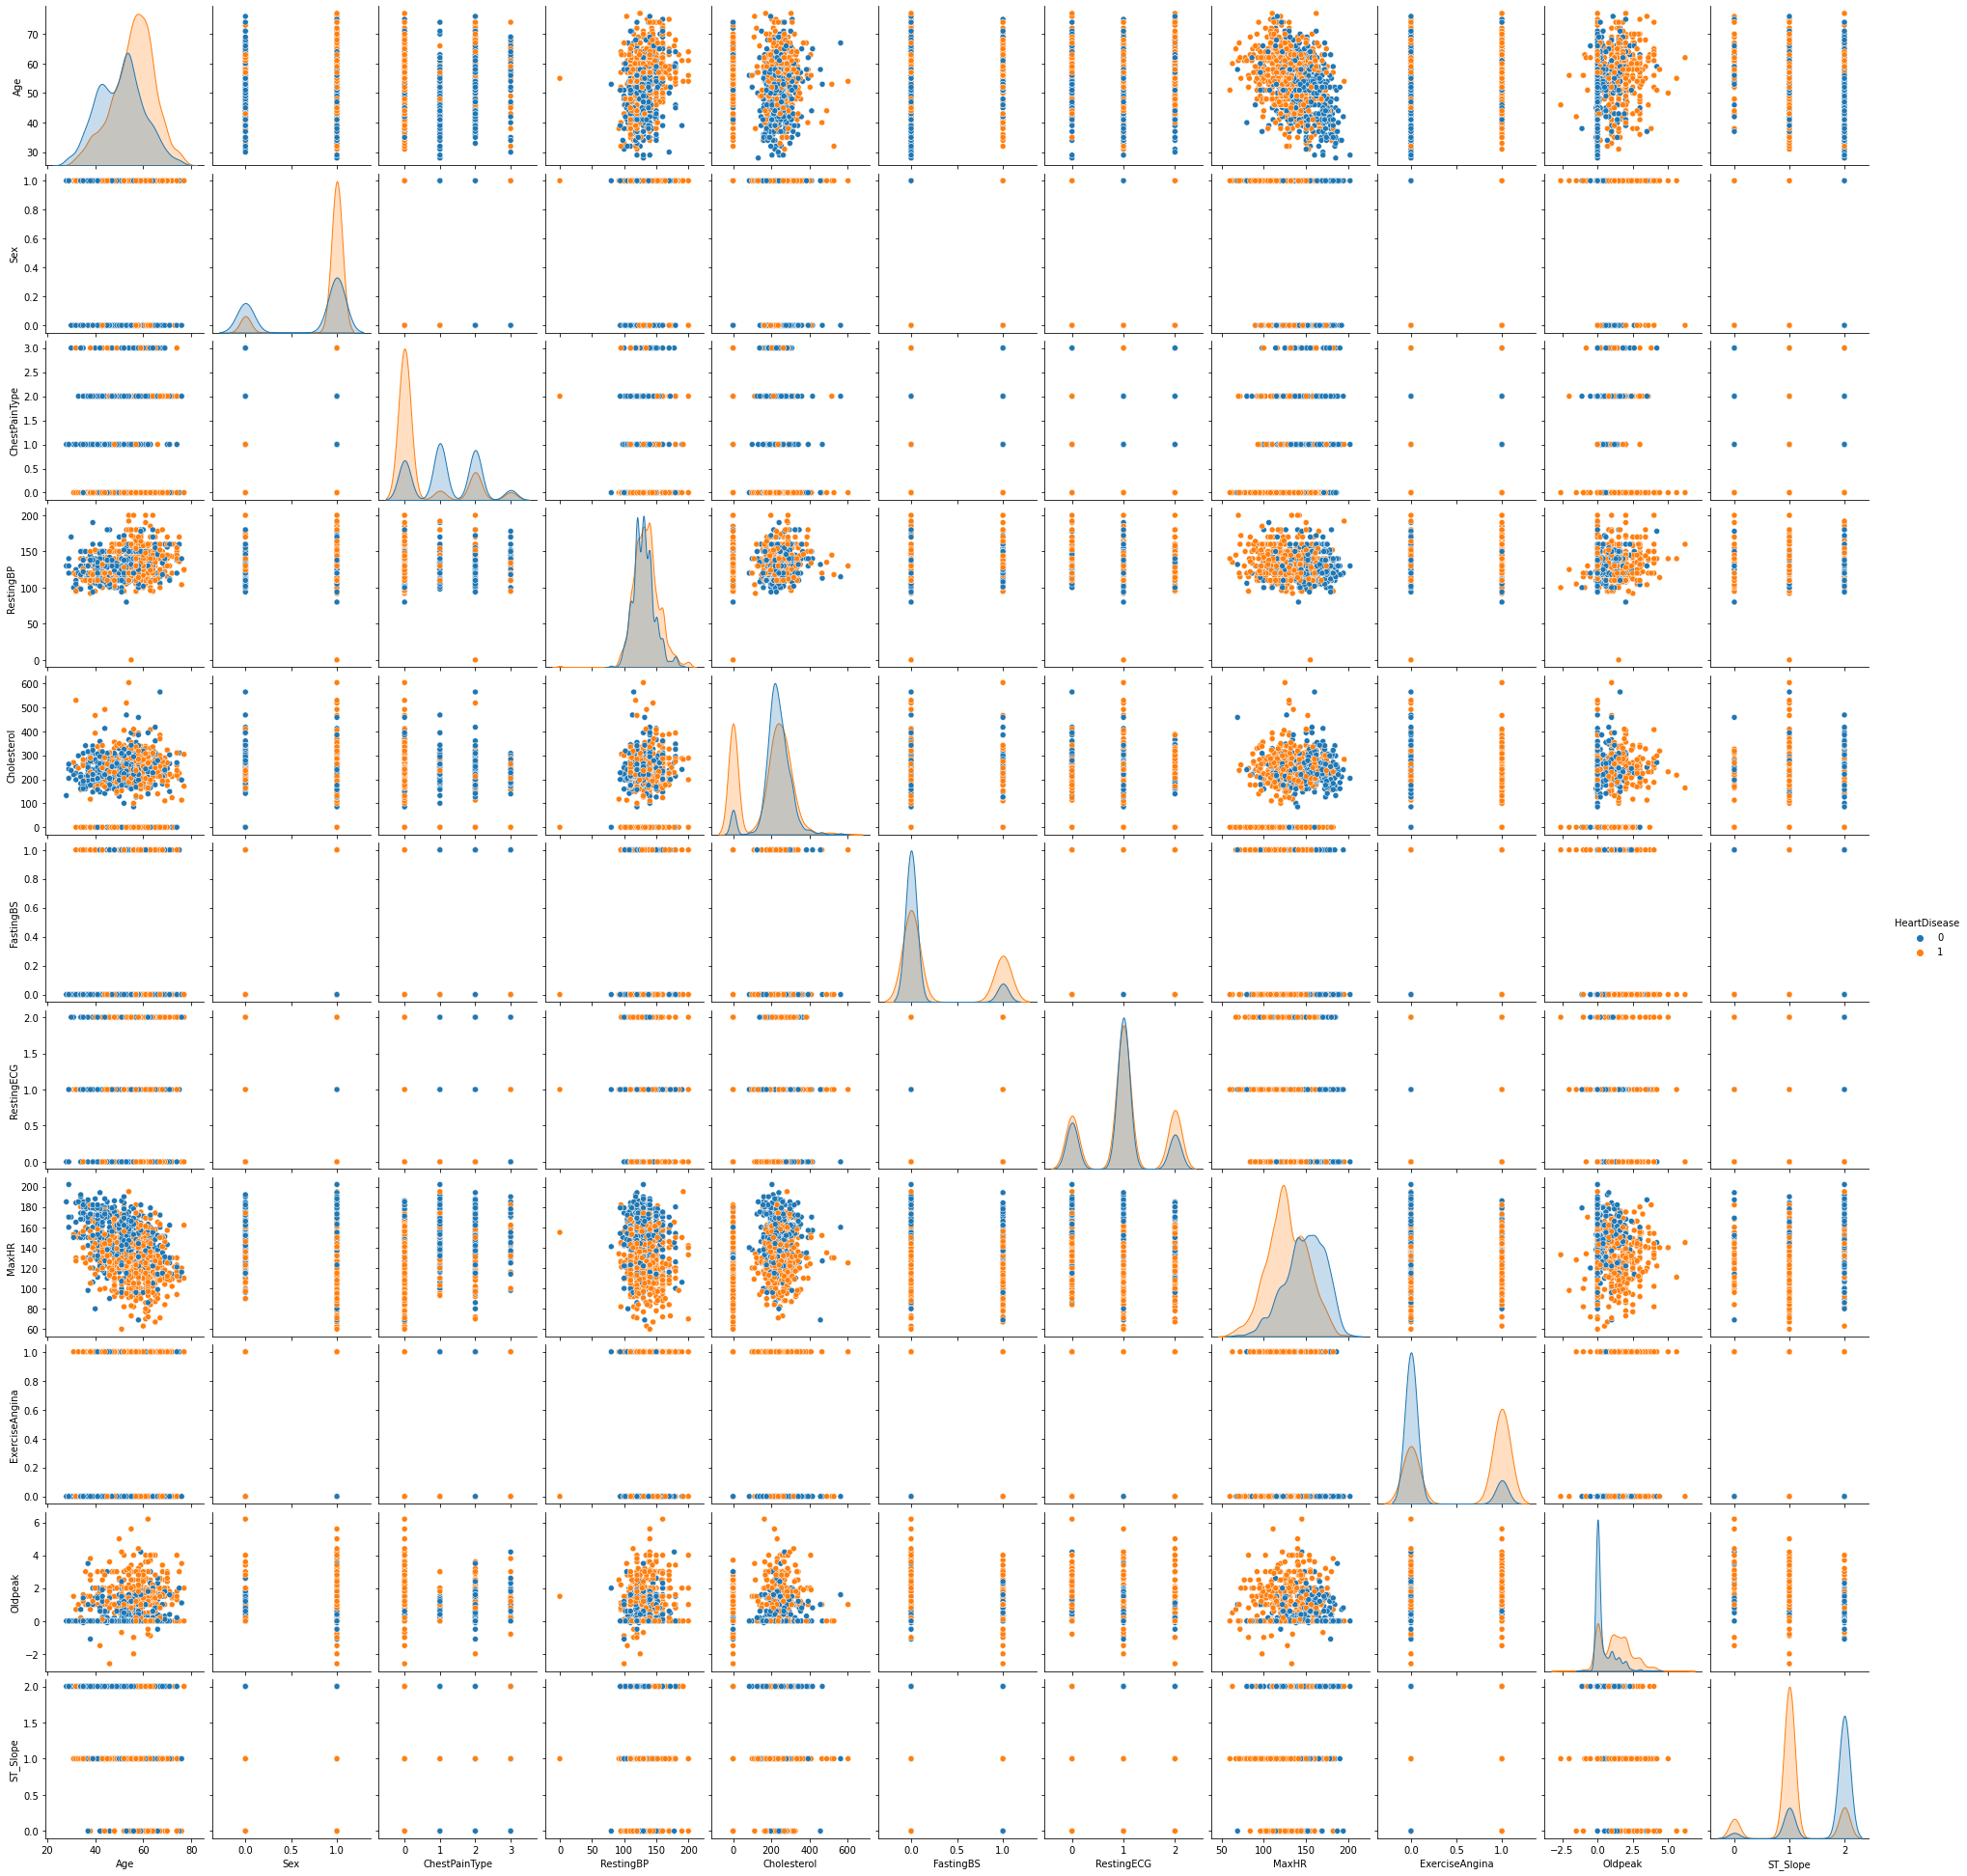

In [ ]:
sns.pairplot(d, hue="HeartDisease", diag_kws={'bw': 0.2})

In [ ]:
logistic=LogisticRegression()
decision=DecisionTreeClassifier()
randomforest=RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=1)
knn=KNeighborsClassifier()
svm=SVC(probability=True)

In [ ]:
models=[logistic,decision,randomforest,knn,svm]

In [ ]:
xdf=d.drop("HeartDisease",axis=1)
ydf=d["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.35,random_state=20)

In [ ]:
mms=MinMaxScaler(feature_range=(0,1))
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
for i in range(1):
    name=['Logistic Regression', 'Decision Tree', 'Random Forest',  'KNN', 'SVM']
    acc=[]
    mae=[]
    for algo in models:
        algo.fit(x_train,y_train)
        predictions=algo.predict(x_test)
        TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
        acy = round((TP+TN)/(TP+FP+TN+FN), 3)
        acc.append(round(acy*100, 2))
        mae.append(mean_absolute_error(y_test,predictions))
    data={"Model":name,"Accuracy":acc,"Mean Absolute Error":mae}
    result=pd.DataFrame(data)
    display(result)

Model  Accuracy  Mean Absolute Error
0  Logistic Regression      85.4             0.145963
1        Decision Tree      55.0             0.450311
2        Random Forest      83.5             0.164596
3                  KNN      85.4             0.145963
4                  SVM      87.0             0.130435

## Stroke Prediction 

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://raw.githubusercontent.com/ADITHYASNAIR2021/Dataset-cart/main/stroke%20data.csv"
data = pd.read_csv(url)
data.drop("id",axis=1,inplace=True)
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [ ]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

In [ ]:
data.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_ty

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data['bmi'].fillna(method="ffill",limit=1,inplace =True)
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21  36.6     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [ ]:
label_encoder = LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
data['ever_married']= label_encoder.fit_transform(data['ever_married'])
data['work_type']= label_encoder.fit_transform(data['work_type'])
data['Residence_type']= label_encoder.fit_transform(data['Residence_type'])
data['smoking_status']= label_encoder.fit_transform(data['smoking_status'])
data.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  36.6               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [ ]:
X=data.drop("stroke",axis=1,inplace=True)
y=data['stroke']

## Alfy edit here 